# Machine learning em Stock market 
## Versão 2.0

-Yahoo finance API 
- yfinance

-Utilizando sklearn
- RadomForest

In [16]:
#Instalar as bibliotecas
! pip install yfinance
import yfinance as yf
! pip install pandas
import pandas as pd


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: C:\Users\igorm\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: C:\Users\igorm\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [7]:
# Baixar os dados
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-15 00:00:00-05:00,5003.140137,5032.720215,4999.439941,5029.729980,4137970000,0.0,0.0
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,0.0,0.0
2024-02-20 00:00:00-05:00,4989.319824,4993.709961,4955.020020,4975.509766,4034880000,0.0,0.0


## Visualização e data cleaning

<Axes: xlabel='Date'>

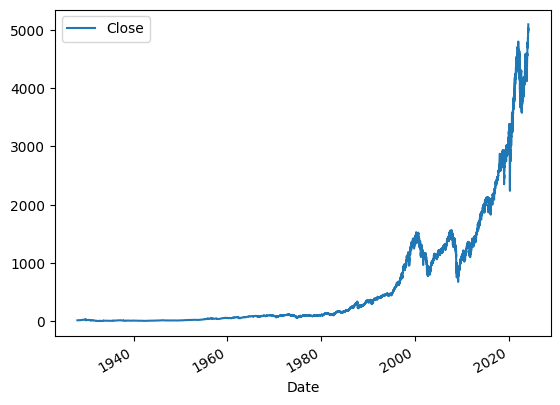

In [9]:
sp500.plot.line(y="Close", use_index=True)

In [10]:
#Remover as colunas Dividends e Stock Splits da base de dados
del sp500["Dividends"]
del sp500["Stock Splits"]

In [12]:
#O target principal desse modelo vai ser prever se o stock vai subir ou descer, e não prever o valor absoluto

# Método shift do pandas 
#   - Shift permite mover os valores da coluna para cima ou para baixo
# Dessa forma consigo criar a coluna "Tomorrow" que demostra os valores que o stock fechou no dia seguinte daquela data

sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-02-15 00:00:00-05:00,5003.140137,5032.720215,4999.439941,5029.729980,4137970000,5005.569824
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,4975.509766
2024-02-20 00:00:00-05:00,4989.319824,4993.709961,4955.020020,4975.509766,4034880000,4981.799805


In [13]:
# Agora se baseando no preço de amanhã em cada linha podemos setar um target

# bool para saber se o preço de amanhã é maior que o preço de hoje
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-02-15 00:00:00-05:00,5003.140137,5032.720215,4999.439941,5029.729980,4137970000,5005.569824,0
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,4975.509766,0
2024-02-20 00:00:00-05:00,4989.319824,4993.709961,4955.020020,4975.509766,4034880000,4981.799805,1


In [15]:
# Outro ponto importante, essa dataframe possui muitos dados históricos, como se pode ver desde 1927
# Nesse caso, uma informação tão antiga assim não será útil para nós porque o mercado pode ter dado shift

#Remover os dados antes de 99
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-02-15 00:00:00-05:00,5003.140137,5032.720215,4999.439941,5029.729980,4137970000,5005.569824,0
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,4975.509766,0
2024-02-20 00:00:00-05:00,4989.319824,4993.709961,4955.020020,4975.509766,4034880000,4981.799805,1


## Treinamento do modelo de machine learning inicial

In [32]:
# Nesse teste utilizarei o Random Forest Classifier
# - Mais dificil de dar overfit
# - Consegue identificar tendencias não lineares


from sklearn.ensemble import RandomForestClassifier

#n_estimators = quant de arvores individuas que quermos treinar
#   Quanto maior o n_estimators mais dificil de dar overfit(até um limite)
# min_samples_split = quantidade de dados necessários para dividir uma folha(quanto maior mais precisao, porem tomar cuidado com overfit)
# random_state = garante que o mesmo resultado seja gerado para cada execução do codigo(seed 1)
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Estamos lidando com dados baseados em data, dessa forma não podemos usar cross validation(Não podemos usar infos futoras para prever o passado)
# Porque o resultado vai possuir uma precisão incrivel durante o treinamento, mas quando aplicado no mundo real vai ter uma precisão baixa(leakege)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [33]:
# Medir a precisão do modelo
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

precision_score(test["Target"], preds)

0.5454545454545454

<Axes: xlabel='Date'>

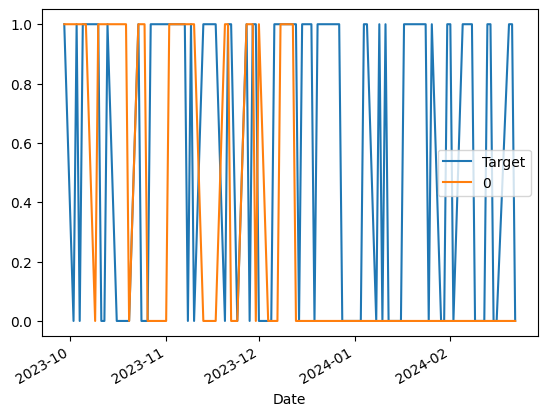

In [34]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [35]:
# No meu teste deu 0.545 de precisão, que não é algo perfeito. Então tentateri melhorar essa precisão

#Backtesting
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
    

In [36]:
predictions = backtest(sp500, model, predictors)
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [37]:
# Checar a porcetagem de dias que o stock de fato subiu
predictions["Target"].value_counts()/ predictions.shape[0]

Target
1    0.53483
0    0.46517
Name: count, dtype: float64

In [41]:
# Vou tentar adicionar mais variaveis de previsão no modelo

# media do fechamento nos periodos de 2 dias, 5 dias(periodo de trade), 3 meses, 1 anos e 4 anos
horizons = [2,5,60,250,1000]

new_predictors = []

for horizon in horizons:
    rolling_avarages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_avarages["Close"]

    #Numero de dias que o stock de fato subiu
    trend_column = f"Trend_{horizon}"

    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

#sp500
sp500 = sp500.dropna()
sp500


C:\Users\igorm\AppData\Local\Temp\ipykernel_14580\983446373.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[ratio_column] = sp500["Close"] / rolling_avarages["Close"]
C:\Users\igorm\AppData\Local\Temp\ipykernel_14580\983446373.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1997-11-26 00:00:00-05:00,950.820007,956.469971,950.820007,951.640015,487750000,955.400024,1,1.000431,2.0,0.997275,4.0,1.009111,33.0,1.113282,138.0,1.517046,563.0
1997-11-28 00:00:00-05:00,951.640015,959.130005,951.640015,955.400024,189070000,974.770020,1,1.001972,2.0,1.001967,4.0,1.012659,33.0,1.116599,139.0,1.521842,564.0
1997-12-01 00:00:00-05:00,955.400024,974.770020,955.400024,974.770020,590300000,971.679993,0,1.010035,2.0,1.019783,4.0,1.032356,34.0,1.138015,140.0,1.551433,564.0
1997-12-02 00:00:00-05:00,974.780029,976.200012,969.830017,971.679993,576120000,976.770020,1,0.998412,1.0,1.011259,4.0,1.028349,33.0,1.133204,140.0,1.545272,563.0
1997-12-03 00:00:00-05:00,971.679993,980.809998,966.159973,976.770020,624610000,973.099976,0,1.002612,1.0,1.011095,4.0,1.032949,33.0,1.137882,141.0,1.552105,564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-14 00:00:00-05:00,4976.439941,5002.520020,4956.450195,5000.620117,3845600000,5029.729980,1,1.004767,1.0,1.000118,3.0,1.051686,38.0,1.139665,138.0,1.244164,530.0
2024-02-15 00:00:00-05:00,5003.140137,5032.720215,4999.439941,5029.729980,4137970000,5005.569824,0,1.002902,2.0,1.004661,3.0,1.055899,38.0,1.145319,139.0,1.250812,531.0
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,4975.509766,0,0.997592,1.0,1.000676,2.0,1.049145,37.0,1.138856,139.0,1.244176,531.0


In [ ]:
# Refazendo o modelo

model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])

    # Agora essa função retorna a probabilidade
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0

    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined
